In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [10]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or n_labels == 1:
            leaf_value = self._most_common_label(y)
            return {'class': leaf_value}

        # Find the best split
        feature_index, threshold = self._best_split(X, y)

        # Split the dataset
        X_left, X_right, y_left, y_right = self._split(X, y, feature_index, threshold)

        # Recursively grow left and right subtrees
        left_subtree = self._grow_tree(X_left, y_left, depth + 1)
        right_subtree = self._grow_tree(X_right, y_right, depth + 1)

        return {'feature_index': feature_index,
                'threshold': threshold,
                'left': left_subtree,
                'right': right_subtree}

    def _best_split(self, X, y):
        best_gini = np.inf
        best_feature, best_threshold = None, None

        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                y_left = y[X[:, feature_index] <= threshold]
                y_right = y[X[:, feature_index] > threshold]
                gini = self._gini_impurity(y_left, y_right)
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold

    def _gini_impurity(self, y_left, y_right):
        p_left = len(y_left) / (len(y_left) + len(y_right))
        p_right = len(y_right) / (len(y_left) + len(y_right))
        gini_left = 1 - sum([(np.sum(y_left == c) / len(y_left)) ** 2 for c in np.unique(y_left)])
        gini_right = 1 - sum([(np.sum(y_right == c) / len(y_right)) ** 2 for c in np.unique(y_right)])
        gini = p_left * gini_left + p_right * gini_right
        return gini

    def _split(self, X, y, feature_index, threshold):
        X_left = X[X[:, feature_index] <= threshold]
        X_right = X[X[:, feature_index] > threshold]
        y_left = y[X[:, feature_index] <= threshold]
        y_right = y[X[:, feature_index] > threshold]
        return X_left, X_right, y_left, y_right

    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def predict_instance(self, x, tree):
        if 'class' in tree:
            return tree['class']
        if x[tree['feature_index']] <= tree['threshold']:
            return self.predict_instance(x, tree['left'])
        else:
            return self.predict_instance(x, tree['right'])

    def predict(self, X):
        return [self.predict_instance(x, self.tree) for x in X]

In [11]:

class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            tree = DecisionTree(max_depth=self.max_depth)
            indices = np.random.choice(len(X), len(X), replace=True)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0).astype(int)

In [12]:
# Create a sample dataset
X = np.array([[0, 0], [1, 1], [0, 1], [1, 0]])
y = np.array([0, 1, 1, 0])

# Define and train the Random Forest classifier
random_forest = RandomForest(n_estimators=10, max_depth=3)
random_forest.fit(X, y)

# Make predictions
predictions = random_forest.predict(X)
print("Predictions:", predictions)

Predictions: [0 0 0 0]


In [13]:
# Create a sample dataset
X = np.array([[0, 0], [1, 1], [0, 1], [1, 0]])
y = np.array([0, 1, 1, 0])

# Define and train the Random Forest classifier
random_forest = RandomForest(n_estimators=10, max_depth=3)
random_forest.fit(X, y)

# Make predictions
predictions = random_forest.predict(X)
print("Predictions:", predictions)

Predictions: [0 0 0 0]


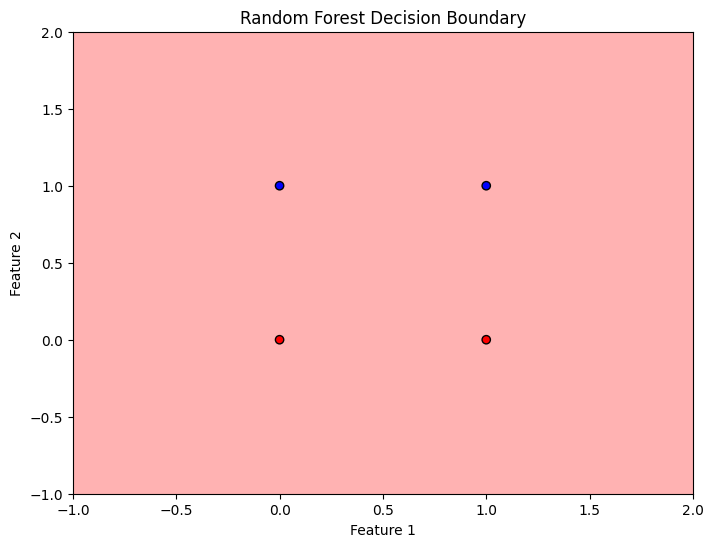

In [14]:
# Define mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Make predictions on the mesh grid
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = random_forest.predict(mesh_points)

# Reshape the predictions to the shape of the mesh grid
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'blue')))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(('red', 'blue')), edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Decision Boundary')
plt.show()
